<h1>Уровень 1</h1> 

<h1>1. Предобработка</h1> 

<h3>Открываем корпус</h3> 

In [275]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

zsh:1: command not found: wget


Python(6391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [276]:
file_path = 'input.txt' #прописываем путь к файлу
with open(file_path, 'r') as file: #открываем файл для чтения ('r')
    text_content = file.read() #записываем содержимое файла в переменную
    
text_content[:100] #выводим первые 100 символов

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

<h3>Чистим текст</h3> 

In [277]:
import re

def clean_text(text):
    text = text.lower() #приводим текст к нижнему регистру
    text = re.sub(r'[^a-z\s]', '', text) #удаляем все символы, кроме букв
    text = re.sub(r'\s+', ' ', text).strip() #удаляем двойные пробелы
    return text
cleaned_text = clean_text(text_content)

cleaned_text[:100] #выводим первые 100 символов

'first citizen before we proceed any further hear me speak all speak speak first citizen you are all '

<h3>Токенизируем корпус</h3> 

In [278]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
tokens = word_tokenize(cleaned_text) #токенизация по словам

tokens[:10]
len(tokens)

[nltk_data] Downloading package punkt to /Users/helen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


202810

<h3>Удаляем стоп-слова</h3> 

In [279]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) #загружаем стоп-слова
filtered_tokens = [word for word in tokens if word.lower() not in stop_words] #удаляем стоп-слова

print("Токены без стоп-слов:", filtered_tokens[:50])
len(filtered_tokens) #кол-во слов в корпусе после чистки

[nltk_data] Downloading package stopwords to /Users/helen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Токены без стоп-слов: ['first', 'citizen', 'proceed', 'hear', 'speak', 'speak', 'speak', 'first', 'citizen', 'resolved', 'rather', 'die', 'famish', 'resolved', 'resolved', 'first', 'citizen', 'first', 'know', 'caius', 'marcius', 'chief', 'enemy', 'people', 'knowt', 'knowt', 'first', 'citizen', 'let', 'us', 'kill', 'well', 'corn', 'price', 'ist', 'verdict', 'talking', 'ont', 'let', 'done', 'away', 'away', 'second', 'citizen', 'one', 'word', 'good', 'citizens', 'first', 'citizen']


107157

<h1>2. Обучение и поиск сходств Word2Vec</h1> 

<h3>Обучение</h3> 

In [284]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=[filtered_tokens], vector_size=100, window=5, min_count=1, workers=4) #задаем параметры нашей модели

In [285]:
model.wv['king'] #выведем результат обучения модели (с семинара)

array([ 9.3145944e-05,  3.1112744e-03, -6.7663677e-03, -1.3235710e-03,
        7.7920300e-03,  7.1407780e-03, -3.5348057e-03,  2.7354809e-03,
       -8.4440298e-03,  6.1859712e-03, -4.6623680e-03, -3.3372582e-03,
        9.1934754e-03,  8.8475487e-04,  7.5921416e-03, -6.2295008e-03,
        5.1741037e-03,  9.7883046e-03, -8.5034324e-03, -5.2907323e-03,
       -6.9990945e-03, -4.7875969e-03, -3.6863915e-03, -8.5909516e-03,
        7.8024808e-03, -4.8888149e-03,  8.3964830e-03,  5.1851803e-03,
       -6.6043390e-03,  3.8205017e-03,  5.6213746e-03, -7.4163340e-03,
       -7.3872157e-03, -2.5352181e-03, -8.5831629e-03, -1.4452643e-03,
       -2.8707134e-04,  3.3098783e-03,  1.3657493e-03, -9.9832762e-04,
       -5.5922349e-03,  1.5047805e-03, -1.0559289e-03,  6.8209413e-03,
        4.0603448e-03,  4.5962986e-03,  1.3078121e-03, -2.6980136e-03,
       -4.2355629e-03, -9.2618784e-04,  1.4751214e-03, -2.7258794e-03,
       -7.0957462e-03, -7.9152538e-03, -9.2687905e-03, -5.7968101e-03,
      

<h3>Считаем сходство</h3> 

<h4>С семинара</h4>

In [286]:
model.wv.similarity('king', 'queen')

-0.036845148

Показатель несколько снизился по сравнению с не очищенным от стоп-слов корпусом с семинара (-0.029)

In [287]:
model.wv.similarity('king', 'prince')

0.10492411

Здесь, наоборот, показатель вырос (по сравнению с 0.027)

In [288]:
model.wv.doesnt_match(['king', 'prince', 'queen'])

'queen'

Результат не изменился

<h4>Другие слова</h4>

In [289]:
model.wv.similarity('love','hate')

0.33124733

In [290]:
model.wv.similarity('love','like')

0.6062044

In [291]:
model.wv.similarity('woman','man')

0.054480758

In [292]:
model.wv.most_similar(["prince"])

[('telling', 0.4255729019641876),
 ('pluckd', 0.36614373326301575),
 ('suffered', 0.3549497425556183),
 ('monster', 0.34580662846565247),
 ('navy', 0.3414638638496399),
 ('apollos', 0.33628857135772705),
 ('wast', 0.3348628878593445),
 ('antique', 0.33073899149894714),
 ('runs', 0.3258797526359558),
 ('external', 0.32358530163764954)]

<h3>Визуализируем</h3> 

In [293]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

In [294]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  vectors_2d = PCA().fit_transform(word_vectors) #сократить размерность векторов до 2D
  plt.figure(figsize=(10,10)) #отрисовка изображения, размер 10 на 10
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='g') #задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  for i, word in enumerate(words): #добавляем подписи к данным, проходимся по списку слов
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1])) #соотносим слово с его двухмерным вектором

Пытаемся посмотреть, какие эпитеты используются по отношению к королям и королевам (по образцу с семинара, но с примененной очисткой от стоп-слов).

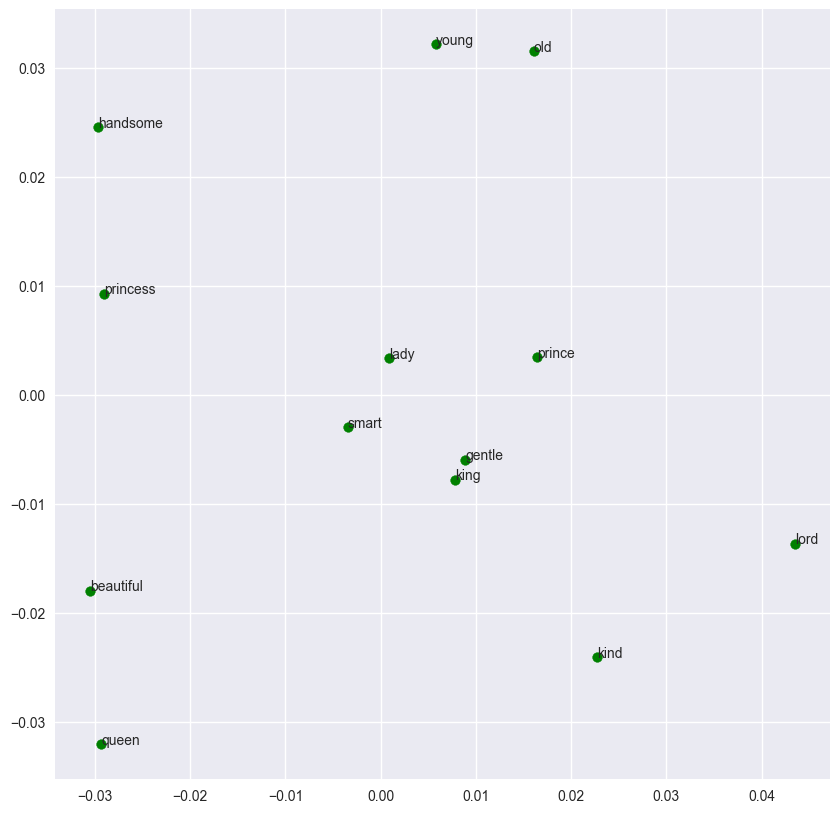

In [295]:
pca_scatterplot(model, ['smart', 'handsome', 'beautiful', 'kind', 'gentle', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])

Получается, что после чистки стоп-слов результат некоторым образом изменился. Удивило, во-первых, то, что слово "prince" больше не соседствует со словами "smart" и "handsome". Также неожиданным показалось соседнее расположение слов "king" и "gentle". 

<h4>Другие слова</h4>

Теперь попытаемся посмотреть, какие эпитеты используются по отношению к женщинам и мужчинам.
Гипотеза состоит в том, что слова вроде "beautiful", "young", pretty" и проч. (во 2-ой строчке) будут ближе к наименованию женщин, а прилагательные вроде "brave", "smart" и проч. (в 1 строчке) будут ближе к наименованию мужчин. 

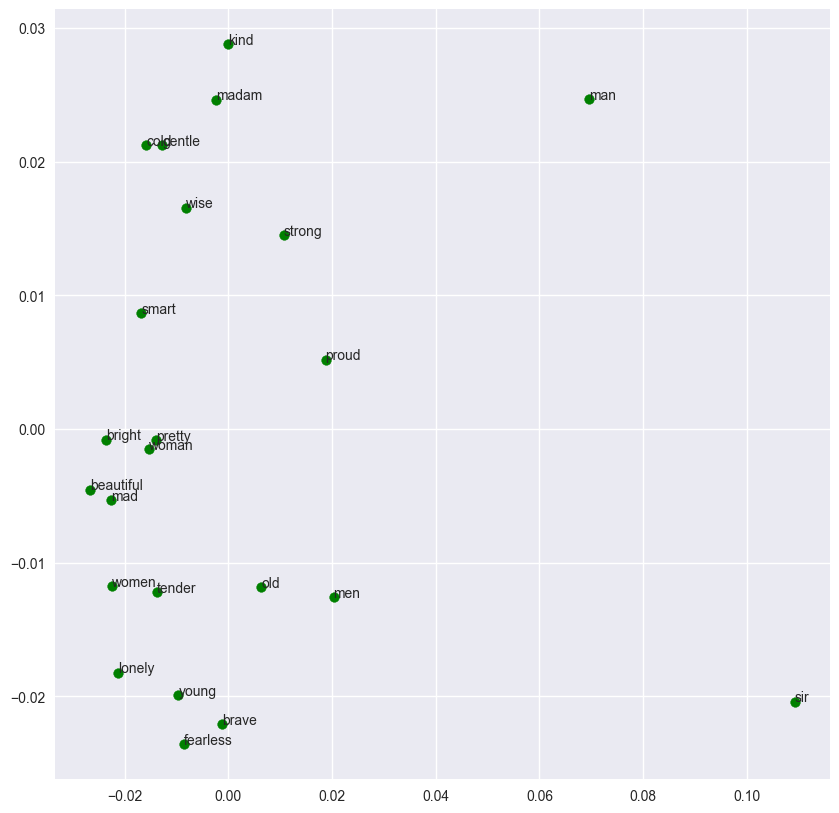

In [296]:
pca_scatterplot(model, ['old', 'brave', 'strong', 'smart', 'cold', 'proud', 'fearless', 'lonely',
                        'beautiful', 'pretty', 'young', 'tender', 'kind', 'gentle', 'bright', 'mad', 'wise',
                        'woman', 'man', 'women', 'men', 'madam', 'sir'])

Довольно показательным кажется фрагмент визуализации, в котором довольно рядом стоят слова "woman" и "bright, beautiful, pretty, mad". То же самое касается слов "women" и "tender".
Также относительно близко расположены слова "madam" и "kind".

К сожалению, какой-либо тенденции с наименованиями, относящимися к мужчинам, обнаружить не вышло: кажется, будто слова "sir, man, men" стоят довольно обособленно от всех выделенных эпитетов. Интересно разве что соседство слов "men" и "old".